In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("Mumbai1.csv")
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
df.shape

(6347, 19)

In [5]:
df['Area'].unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [6]:
df.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [7]:
df1 = df.drop(["Landscaped Gardens","Indoor Games","Jogging Track","Gas Connection","Intercom"], axis = 'columns')
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,0


In [8]:
df1.shape

(6347, 14)

In [9]:
df2 = df1.copy()
df2['PricePerSqft'] = df2['Price']/df2['Area']
df2.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Swimming Pool,PricePerSqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,0,7518.796992


In [10]:
len(df2.Location.unique())

413

In [11]:
location_stats = df2.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Borivali West           176
                       ... 
Pokhran Road No 2         1
Poonam Sagar Complex      1
Ramdev Park               1
Ranjanpada                1
worli sea face            1
Name: Location, Length: 413, dtype: int64

In [12]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Location
Sector 19 Kharghar      10
Sion                    10
Majiwada                10
Lower Parel              9
Sector12 Kamothe         9
                        ..
Pokhran Road No 2        1
Poonam Sagar Complex     1
Ramdev Park              1
Ranjanpada               1
worli sea face           1
Name: Location, Length: 324, dtype: int64

In [13]:
len(location_stats_less_than_10)

324

In [14]:
df2.Location = df2.Location.apply(lambda x : 'Other' if x in location_stats_less_than_10 else x)
len(df2.Location.unique())

90

In [15]:
df2.shape

(6347, 15)

In [16]:
df2.PricePerSqft.describe()

count      6347.000000
mean      13555.465839
std        9573.921483
min        1597.444089
25%        7234.042553
50%       10493.827160
75%       17142.857143
max      109950.522265
Name: PricePerSqft, dtype: float64

In [17]:
def remove_pricepersqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.PricePerSqft)
        st = np.std(subdf.PricePerSqft)
        reduced_df = subdf[(subdf.PricePerSqft>(m-st)) & (subdf.PricePerSqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df3 = remove_pricepersqft_outliers(df2)
df3.shape

(4922, 15)

In [18]:
df3.rename(columns = {'No. of Bedrooms' : 'BHK'}, inplace = True)
df3.head(10)

,Unnamed: 0,Price,Area,Location,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Swimming Pool,PricePerSqft
0,964,6200000,400,Airoli,1,0,0,1,1,1,1,0,0,0,15500.000000
1,965,9500000,1000,Airoli,2,0,0,1,1,1,1,0,1,1,9500.000000
2,1145,14900000,1245,Airoli,2,1,0,1,1,0,0,0,0,0,11967.871486
3,1146,14000000,1183,Airoli,2,1,1,1,1,0,1,1,1,1,11834.319527
4,1884,14800000,1245,Airoli,2,0,0,1,1,1,1,0,0,0,11887.550201
5,2433,6400000,495,Airoli,1,0,0,0,0,0,0,0,0,0,12929.292929
6,4105,11100000,1050,Airoli,2,0,0,1,0,0,0,0,0,0,10571.428571
7,4148,7500000,600,Airoli,1,0,0,1,0,0,1,1,1,0,12500.000000
8,4153,7500000,600,Airoli,1,0,0,1,0,0,0,1,0,0,12500.000000
9,4177,7600000,650,Airoli,1,0,0,0,0,0,0,1,1,1,11692.307692


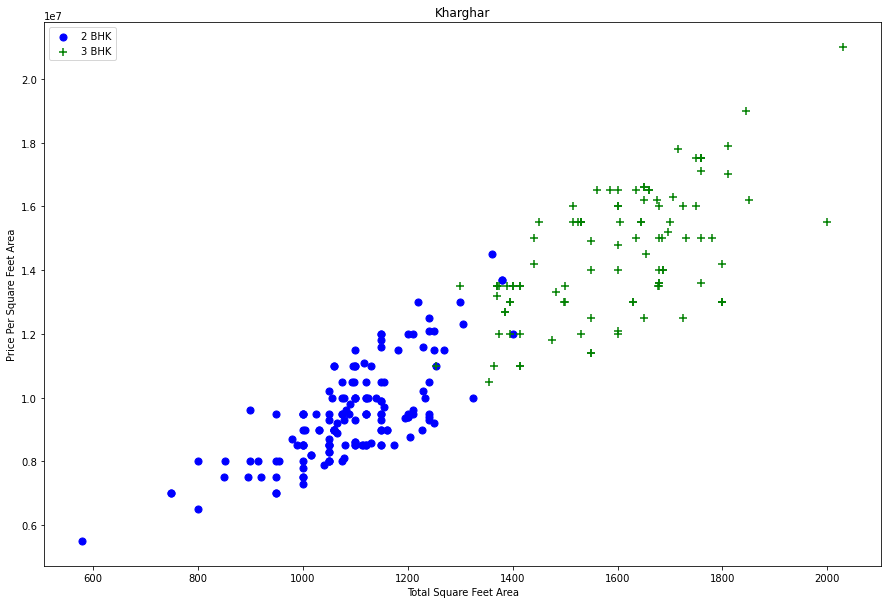

In [19]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location==Location) & (df.BHK==2)]
    bhk3 = df[(df.Location==Location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color = 'blue',label = '2 BHK',s = 50)
    plt.scatter(bhk3.Area,bhk3.Price,marker = '+',color = 'green',label = '3 BHK',s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet Area')
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df3,"Kharghar")

Text(0, 0.5, 'Count')

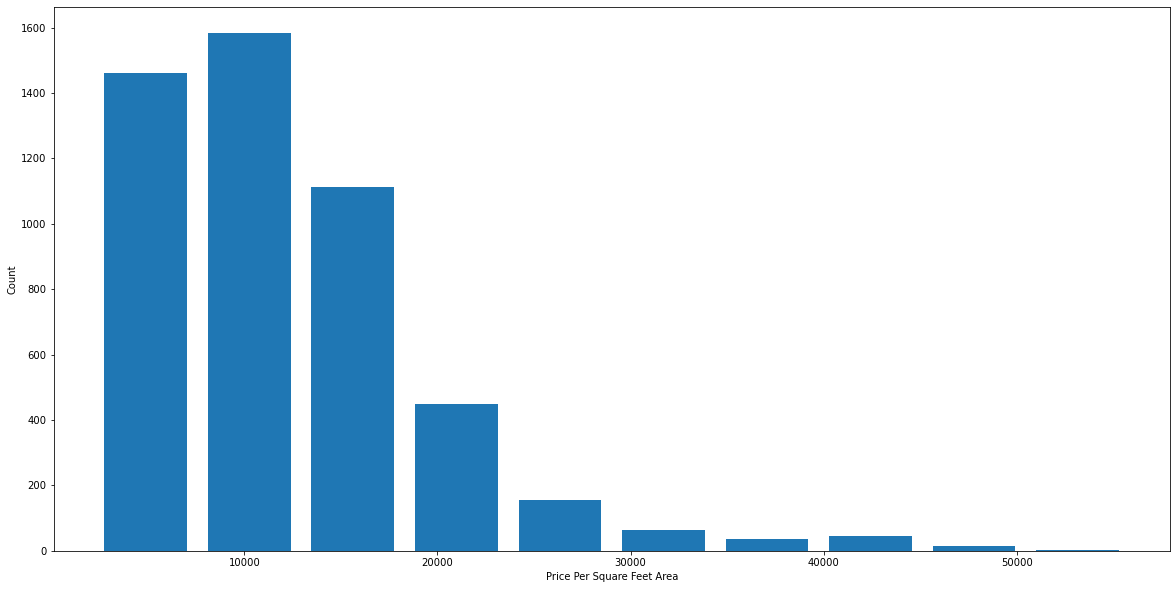

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df3.PricePerSqft,rwidth = 0.8)
plt.xlabel('Price Per Square Feet Area')
plt.ylabel('Count')

In [21]:
df3.shape

(4922, 15)

In [22]:
dummies = pd.get_dummies(df3.Location)
dummies.head(5)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df4 = pd.concat([df3,dummies], axis = 'columns')
df4.head(10)

,Unnamed: 0,Price,Area,Location,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,964,6200000,400,Airoli,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,965,9500000,1000,Airoli,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1145,14900000,1245,Airoli,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1146,14000000,1183,Airoli,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1884,14800000,1245,Airoli,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2433,6400000,495,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4105,11100000,1050,Airoli,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4148,7500000,600,Airoli,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4153,7500000,600,Airoli,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4177,7600000,650,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
final_dataframe = df4.drop(['Location'], axis = 'columns')
final_dataframe.head(10)

,Unnamed: 0,Price,Area,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,964,6200000,400,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,965,9500000,1000,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1145,14900000,1245,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1146,14000000,1183,2,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1884,14800000,1245,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2433,6400000,495,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4105,11100000,1050,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4148,7500000,600,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,4153,7500000,600,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4177,7600000,650,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X = final_dataframe.drop(['Price'],axis = 'columns')
X.head()

,Unnamed: 0,Area,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,964,400,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,965,1000,2,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1145,1245,2,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1146,1183,2,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1884,1245,2,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = final_dataframe.Price
y.head()

0     6200000
1     9500000
2    14900000
3    14000000
4    14800000
Name: Price, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [28]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9083525589725526

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.9139312 , 0.91490317, 0.88511169, 0.92464437, 0.90193731])

In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

def find_best_algo_using_grid_search(X,y):
    algos = {
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'max_iter' : [50,100]
            }
        },
        'ridge' : {
            'model' : Ridge(),
            'params' : {
                'alpha' : [1,2],
                'max_iter' : [50,100]
            }
        },
        'decision tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
        return pd.DataFrame(scores,columns = ['model','best_score','best_params'])
    
    
find_best_algo_using_grid_search(X,y)

,model,best_score,best_params
0,linear regression,0.906612,{'normalize': True}
